# 提示詞
> DataFrame 如何繪製直方圖，第1軸以bins 的值，用長條圖呈現，第2軸為 bins之累計百分比

In [7]:
# 繪圖中文字型
# 設定中文字型
# 依不同平台 (Windows/Mac) 需設定不同中文字型
import sys 
import matplotlib.pyplot as plt

if sys.platform == "win32":
    # Windows 
    plt.rcParams['font.family'] = 'SimHei'
elif sys.platform == "darwin":
    plt.rcParams['font.family'] = 'Heiti TC' 
else:
    assert "未知作業系統"

# Gemini

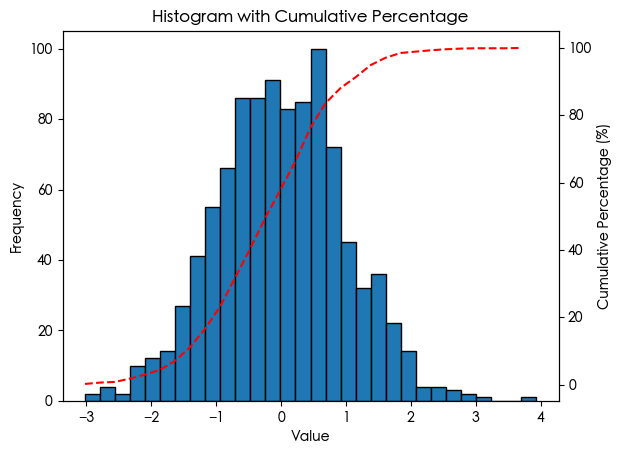

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成隨機數資料
data = np.random.randn(1000)
df = pd.DataFrame(data, columns=['value'])

# 繪製直方圖並獲取 bins 和 counts
counts, bins, ignored = plt.hist(df['value'], bins=30, edgecolor='black')

# 計算累計百分比
cumulative_percentage = np.cumsum(counts) / len(df) * 100

# 創建第二軸
ax1 = plt.gca()
ax2 = ax1.twinx()

# 繪製累計百分比
ax2.plot(bins[:-1], cumulative_percentage, color='red', linestyle='--')

# 設定軸標籤和標題
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage (%)')
plt.title('Histogram with Cumulative Percentage')

# 顯示圖表
plt.show()

# Claude AI

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假設我們有一個數據框，例如:
# df = pd.DataFrame({'data': np.random.normal(0, 1, 1000)})

def plot_histogram_with_cumulative_percentage(df, column, bins=10, figsize=(10, 6)):
    """
    繪製直方圖，左側Y軸顯示頻率，右側Y軸顯示累計百分比
    
    參數：
    df: DataFrame
    column: 要繪製直方圖的列名
    bins: 分桶數量或分桶邊界列表
    figsize: 圖像大小
    """
    # 創建圖形和軸
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # 繪製直方圖
    counts, bin_edges, patches = ax1.hist(df[column], bins=bins, color='skyblue', alpha=0.7)
    
    # 設置左側Y軸標籤
    ax1.set_xlabel(column)
    ax1.set_ylabel('頻率')
    
    # 創建右側Y軸用於累計百分比
    ax2 = ax1.twinx()
    
    # 計算累計百分比
    total = len(df[column])
    cumulative_pct = np.cumsum(counts) / total * 100
    
    # 計算每個bin的中點作為折線圖的X座標
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # 繪製累計百分比折線圖
    ax2.plot(bin_centers, cumulative_pct, color='red', marker='o', linestyle='-', linewidth=2)
    
    # 設置右側Y軸標籤
    ax2.set_ylabel('累計百分比 (%)')
    ax2.set_ylim([0, 105])  # 設置Y軸範圍，留出一些頂部空間
    
    # 添加網格線以便更好地閱讀
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # 添加標題
    plt.title(f'{column}的直方圖與累計百分比')
    
    # 添加圖例
    ax1.legend(['頻率'], loc='upper left')
    ax2.legend(['累計百分比'], loc='lower right')
    
    # 顯示圖形
    plt.tight_layout()
    plt.show()
    
    return fig, ax1, ax2

# 使用示例
# plot_histogram_with_cumulative_percentage(df, 'data', bins=20)

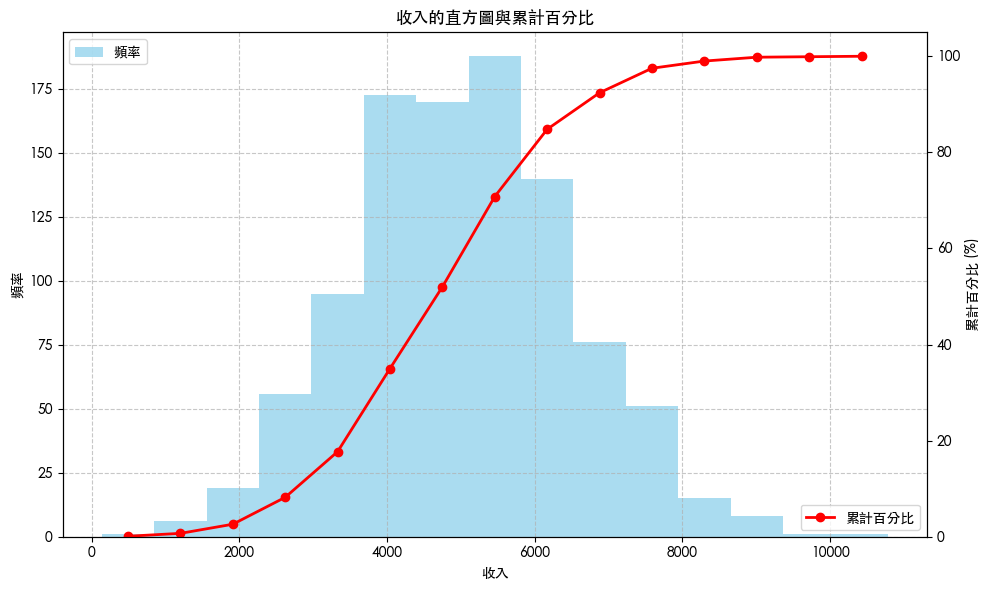

(<Figure size 1000x600 with 2 Axes>,
 <Axes: xlabel='收入', ylabel='頻率'>,
 <Axes: title={'center': '收入的直方圖與累計百分比'}, ylabel='累計百分比 (%)'>)

In [10]:
# 創建一個示例DataFrame
import pandas as pd
import numpy as np

# 生成一些示例數據
np.random.seed(42)
df = pd.DataFrame({'收入': np.random.normal(5000, 1500, 1000)})

# 繪製直方圖與累計百分比
plot_histogram_with_cumulative_percentage(df, '收入', bins=15)

# ChatGPT

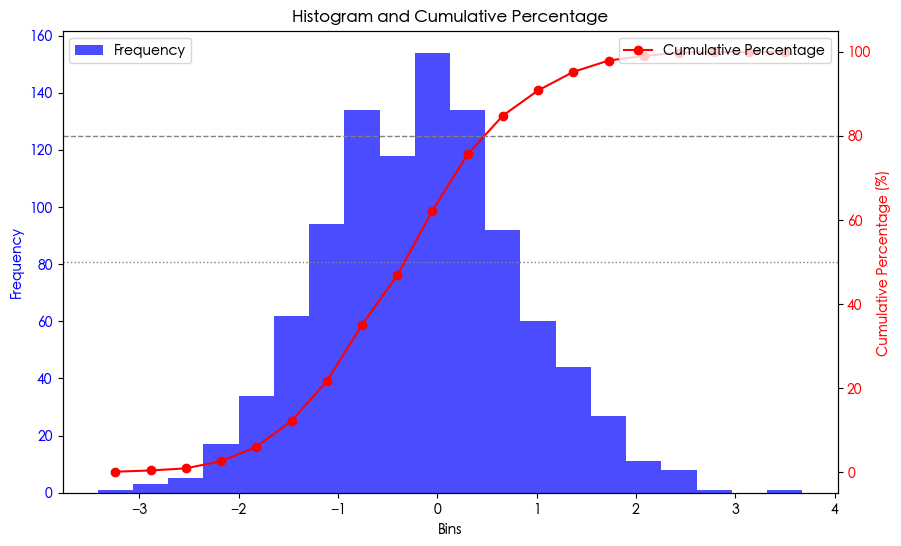

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 生成範例數據
np.random.seed(42)
data = np.random.randn(1000)  # 產生 1000 個標準常態分佈數據

# 建立 DataFrame
df = pd.DataFrame({'values': data})

# 設定 bins
num_bins = 20
counts, bin_edges = np.histogram(df['values'], bins=num_bins)

# 計算累計百分比
cum_perc = np.cumsum(counts) / sum(counts) * 100

# 繪圖
fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製長條圖
ax1.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), alpha=0.7, color='b', label='Frequency')
ax1.set_xlabel("Bins")
ax1.set_ylabel("Frequency", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 設置次軸（累計百分比）
ax2 = ax1.twinx()
ax2.plot(bin_edges[:-1], cum_perc, color='r', marker='o', linestyle='-', label='Cumulative Percentage')
ax2.set_ylabel("Cumulative Percentage (%)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 顯示輔助線
ax2.axhline(y=80, color='gray', linestyle='dashed', linewidth=1)  # 80% 累計線
ax2.axhline(y=50, color='gray', linestyle='dotted', linewidth=1)  # 50% 累計線

# 圖例
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Histogram and Cumulative Percentage")
plt.show()
